In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import mannwhitneyu ## for those wonderful p-values!
from scipy.stats import spearmanr

## Nature journal settings
plt.rcParams["font.family"] = "Arial"
colors = ["#E64B35FF", "#3C5488FF", "#00A087FF", "#4DBBD5FF", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF"]
sns.set_palette(sns.color_palette(colors))

fn = '../results/2023-08-10_clust/run_2d/analysis/results.csv'
df = pd.read_csv(fn)
df.head()

,dataset,percent-heldout,seed,transfer,raw,target_only
0,log_REP_GDSC,20,0,0.810710,0.501466,0.806638
1,log_REP_GDSC,20,1,0.818809,0.521551,0.817445
2,log_REP_GDSC,20,2,0.812328,0.513712,0.804020
3,log_REP_GDSC,20,3,0.827824,0.503190,0.815933
4,log_REP_GDSC,20,4,0.829023,0.508852,0.808236


In [20]:
df = df.loc[df.dataset == 'log_GDSC_CTD2']
np.random.seed(100)

## Generate some fake data.
method_names = ["transfer", "target_only", "raw"]
variable_values = [20, 40, 60, 80]


## Get those p-values!
for method in method_names:
    sub_df = df[['dataset', 'percent-heldout', method]]
    print(method, spearmanr(sub_df['percent-heldout'], sub_df[method]))

transfer SignificanceResult(statistic=-0.9453033899557928, pvalue=4.40903622786306e-20)
target_only SignificanceResult(statistic=-0.9491775841769231, pvalue=1.1294975817966735e-20)
raw SignificanceResult(statistic=-0.1259113121867347, pvalue=0.43883030643772947)


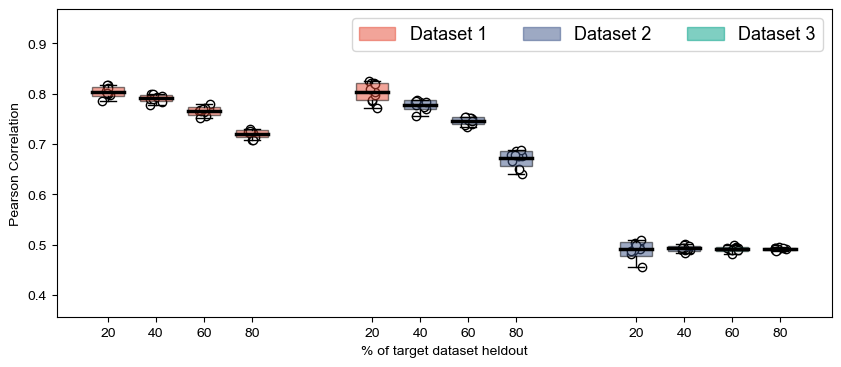

In [22]:
fig, ax = plt.subplots(figsize=(10,4))
stats = []
positions = []
curr_pos = 0
for method in method_names:
    for var in variable_values:
        v = df[df["percent-heldout"]==var][method]
        mu = np.mean(v)
        stdv = np.std(v)
        stats.append({"med":mu, 
                      "q1":mu-stdv, 
                      "q3":mu+stdv, 
                      "whislo":np.min(v), 
                      "whishi":np.max(v), 
                      "label":str(var)})
        
        ax.scatter(x=(curr_pos + np.random.uniform(-0.75, 0.75, size=len(v))), 
                   y=v, 
                   color='white', 
                   edgecolors="black", 
                   zorder=-1)
        positions.append(curr_pos)
        curr_pos += 6
    curr_pos += 9

## Make boxplots
bplot = ax.bxp(stats, 
               positions=positions, 
               widths=4, 
               showfliers=False, 
               medianprops=dict(linestyle='-', linewidth=2.5, color='black'), 
               patch_artist=True, 
               zorder=0)
for i, patch in enumerate(bplot['boxes']):
    patch.set_facecolor(colors[i//5]) ## Use those nature colors
    patch.set_alpha(0.5)

plt.xlabel("% of target dataset heldout")
plt.ylabel("Pearson Correlation")
plt.ylim(np.min(df['raw'])-0.1, np.max(df['transfer'])+0.15)

patch1 = mpatches.Patch(color=colors[0], alpha=0.5, label='Dataset 1')
patch2 = mpatches.Patch(color=colors[1], alpha=0.5, label='Dataset 2')
patch3 = mpatches.Patch(color=colors[2], alpha=0.5, label='Dataset 3')

plt.legend(handles=[patch1, patch2, patch3], ncol=3, fontsize=13, loc='upper right')